# Linear Regression analysis to show the relationship between the revenue and budget
#We are going to connect to the dataframe and only pull out revenue and budget as we only want to see the trend between revenue and budget.

#We will clean the metadata to only reflect what columns we want to repersent the new dataframe.


In [2]:
#Import dependencies 
import psycopg2
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.preprocessing import StandardScaler

In [3]:
#establishing the connection
conn = psycopg2.connect(
   database="movies_db", user='postgres', password='finalproject', host='moviesdb.ct0o6q0pbonx.us-east-2.rds.amazonaws.com', port= '5432'
)


In [4]:
#Setting auto commit false
conn.autocommit = True


In [5]:
#Creating a cursor object using the cursor() method
cursor = conn.cursor()

In [6]:
cursor.execute('''select m.budget, m.revenue
from movies_metadata m ''')

In [7]:
#Fetching 1st row from the table
result = cursor.fetchone();
print(result)

(30000000, Decimal('373554033.0'))


In [8]:
#Fetching all rows from the table
result = cursor.fetchall();
print(result)

[(65000000, Decimal('262797249.0')), (16000000, Decimal('81452156.0')), (0, Decimal('76578911.0')), (60000000, Decimal('187436818.0')), (35000000, Decimal('64350171.0')), (58000000, Decimal('352194034.0')), (62000000, Decimal('107879496.0')), (0, Decimal('11348324.0')), (44000000, Decimal('13681765.0')), (98000000, Decimal('10017322.0')), (52000000, Decimal('116112375.0')), (16500000, Decimal('135000000.0')), (4000000, Decimal('4300000.0')), (30000000, Decimal('212385533.0')), (60000000, Decimal('35431113.0')), (30250000, Decimal('115101622.0')), (50000000, Decimal('30303072.0')), (3600000, Decimal('49800000.0')), (12000000, Decimal('27400000.0')), (18000000, Decimal('1738611.0')), (0, Decimal('180000000.0')), (29500000, Decimal('168840000.0')), (30000000, Decimal('254134910.0')), (11000000, Decimal('39363635.0')), (0, Decimal('676525.0')), (18000000, Decimal('122195920.0')), (20000000, Decimal('21284514.0')), (10000000, Decimal('23574130.0')), (33000000, Decimal('327311859.0')), (5500

# Creating the Dataframe
#We are creating the dataframe that will be use to show use our linear regression line and detrime the relationship of the data  coumns revenue and budget.

In [9]:
data = pd.DataFrame(result,columns=["Budget","Revenue"])
data.head()

,Budget,Revenue
0,65000000,262797249.0
1,16000000,81452156.0
2,0,76578911.0
3,60000000,187436818.0
4,35000000,64350171.0


In [10]:
data["Revenue"] = data["Revenue"].astype('int64')
data.head()

,Budget,Revenue
0,65000000,262797249
1,16000000,81452156
2,0,76578911
3,60000000,187436818
4,35000000,64350171


In [11]:
#Closing the connection
conn.close()

In [12]:
#showcasing staticts of the data
data.describe()

,Budget,Revenue
count,7.396000e+03,7.396000e+03
mean,2.260351e+07,6.882474e+07
std,3.695263e+07,1.464795e+08
min,0.000000e+00,1.000000e+00
25%,0.000000e+00,2.401132e+06
50%,7.500000e+06,1.683423e+07
75%,2.800000e+07,6.730942e+07
max,3.800000e+08,2.787965e+09


# Charting the relationship by using scatter plots



In [13]:
#Defining the variables X and y
X = pd.DataFrame(data, columns=['Budget'])
y = pd.DataFrame(data, columns=['Revenue'])

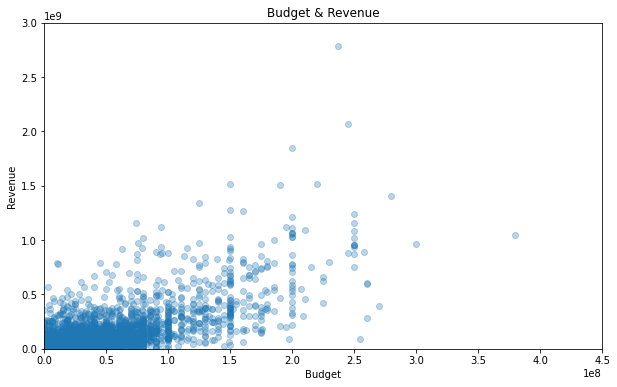

In [14]:
# Graphing the scatter plot graph
plt.figure(figsize=(10,6))
plt.scatter(X,y, alpha=0.3)
plt.title("Budget & Revenue")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.xlim(0, 450000000)
plt.ylim(0, 3000000000)
plt.show()

In [15]:
regression = LinearRegression()
regression.fit(X,y)


LinearRegression()

In [16]:
# Finding the coefficant
regression.coef_

array([[2.95190651]])

In [17]:
#showcasing staticts of the data
data.describe(include='all')

,Budget,Revenue
count,7.396000e+03,7.396000e+03
mean,2.260351e+07,6.882474e+07
std,3.695263e+07,1.464795e+08
min,0.000000e+00,1.000000e+00
25%,0.000000e+00,2.401132e+06
50%,7.500000e+06,1.683423e+07
75%,2.800000e+07,6.730942e+07
max,3.800000e+08,2.787965e+09


In [18]:
# find the Interception
regression.intercept_

array([2101281.06400976])

# Adding the linear regression line to the scatter plot

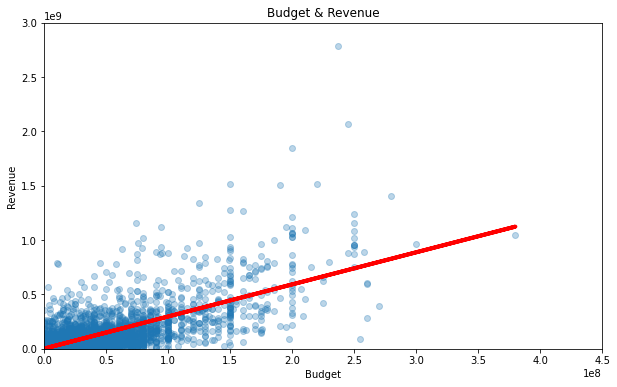

In [19]:
#plotting the Linear Regression
plt.figure(figsize=(10,6))
plt.scatter(X,y, alpha=0.3)
plt.plot(X, regression.predict(X), color="red", linewidth=4)
plt.title("Budget & Revenue")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.xlim(0, 450000000)
plt.ylim(0, 3000000000)
plt.show()

# Detriming the regression Score and how closing it comes to 1.0

In [20]:
#Finding the regression score
regression.score(X,y)

0.5545516724233641